## Before start

In [128]:
import torch
print("CUDA Available:", torch.cuda.is_available())
'''You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'''

CUDA Available: True


'You can use prompt nvidia-smi in anaconda command prompt to check CUDA availability and GPU availability'

## Set up the Environment

In [129]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.75  Python-3.10.15 torch-2.6.0.dev20241206+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (16 CPUs, 15.9 GB RAM, 494.1/931.5 GB disk)


In [131]:
# Import Libraries
import torch
import ultralytics
from ultralytics import YOLO

import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import supervision as sv

# Fix for image loading
import imageio.v2 as imageio
from imageio import imread

from IPython.display import Image as IPyImage

%matplotlib inline

In [132]:
HOME = 'output'
print(HOME)

output


## Play Picture

**NOTE**
*   Play picture is like you want to try a picture to test with pretained model (YOLO - V08).

>> Using the Test My Love Image: temp\Kept.png


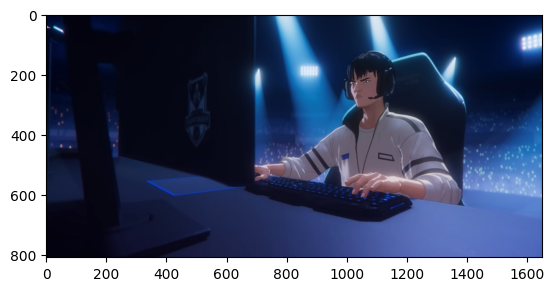

In [134]:
image_path = "temp\\Kept.png"

print(">> Using the Test My Love Image: {}".format(image_path))
img = imageio.imread(image_path)
plt.imshow(img)

## Helping Function

In [135]:
def showResult(result, img_path):
    # Load image properly
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Error: Could not load image from path {img_path}")
    # Assuming 'result' is a list and you want to access the first element
    result_item = result[0]

    # Now pass the result_item to the Detections object
    detections = sv.Detections.from_ultralytics(result_item)

    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

    annotated_image = img.copy()
    annotated_image = box_annotator.annotate(annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(annotated_image, detections=detections)

    # # Convert image to RGB if it's in BGR format (common in OpenCV)
    # img_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Plot the image
    sv.plot_image(annotated_image, size=(10, 10))

## YOLOv11 - Pretrained Model

In [136]:
# Define a YOLO model and print the model summary

# Load the model
model = YOLO('yolo11l.pt')

# Model summary
model.info()

YOLO11l summary: 631 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs


(631, 25372160, 0, 87.6134912)

In [137]:
from torchinfo import summary

# Get model summary (like Keras)
summary(model.model, input_size=(10, 3, 640, 640))

Layer (type:depth-idx)                                       Output Shape              Param #
DetectionModel                                               [10, 84, 8400]            --
├─Sequential: 1-1                                            --                        --
│    └─Conv: 2-1                                             [10, 64, 320, 320]        --
│    │    └─Conv2d: 3-1                                      [10, 64, 320, 320]        (1,728)
│    │    └─BatchNorm2d: 3-2                                 [10, 64, 320, 320]        (128)
│    └─Detect: 2-288                                         --                        (recursive)
│    │    └─ModuleList: 3-311                                --                        (recursive)
│    └─Conv: 2-3                                             [10, 128, 160, 160]       --
│    │    └─Conv2d: 3-4                                      [10, 128, 160, 160]       (73,728)
│    │    └─BatchNorm2d: 3-5                                 [1

In [138]:
# Count trainable and non-trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")

Trainable Parameters: 0
Non-Trainable Parameters: 25,372,160


The reason that all parameters are not trainable, because default of YOLO model is frozen. YOLO model is frozen because YOLO want to speed up prediction for unseen data, by does not need to weight update.
<br>**Important Keyword:**
- Inference is mean the process of using a trained model to make predictions on new, unseen data.

**Example of inference with YOLO**

In [139]:
# SDK (Software Development) prompt
# Input unseen data (Inference) to pretrained model
result = model.predict(image_path, save_dir=f'{HOME}/runs/detect/predict/', save = True)

# Show the result
plt.show(result)


image 1/1 d:\AB-BiMaGOoOD\DiddyLearning\temp\Kept.png: 320x640 1 person, 1 keyboard, 24.5ms
Speed: 1.6ms preprocess, 24.5ms inference, 4.0ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs\detect\predict4


In [141]:
# print(result[0])

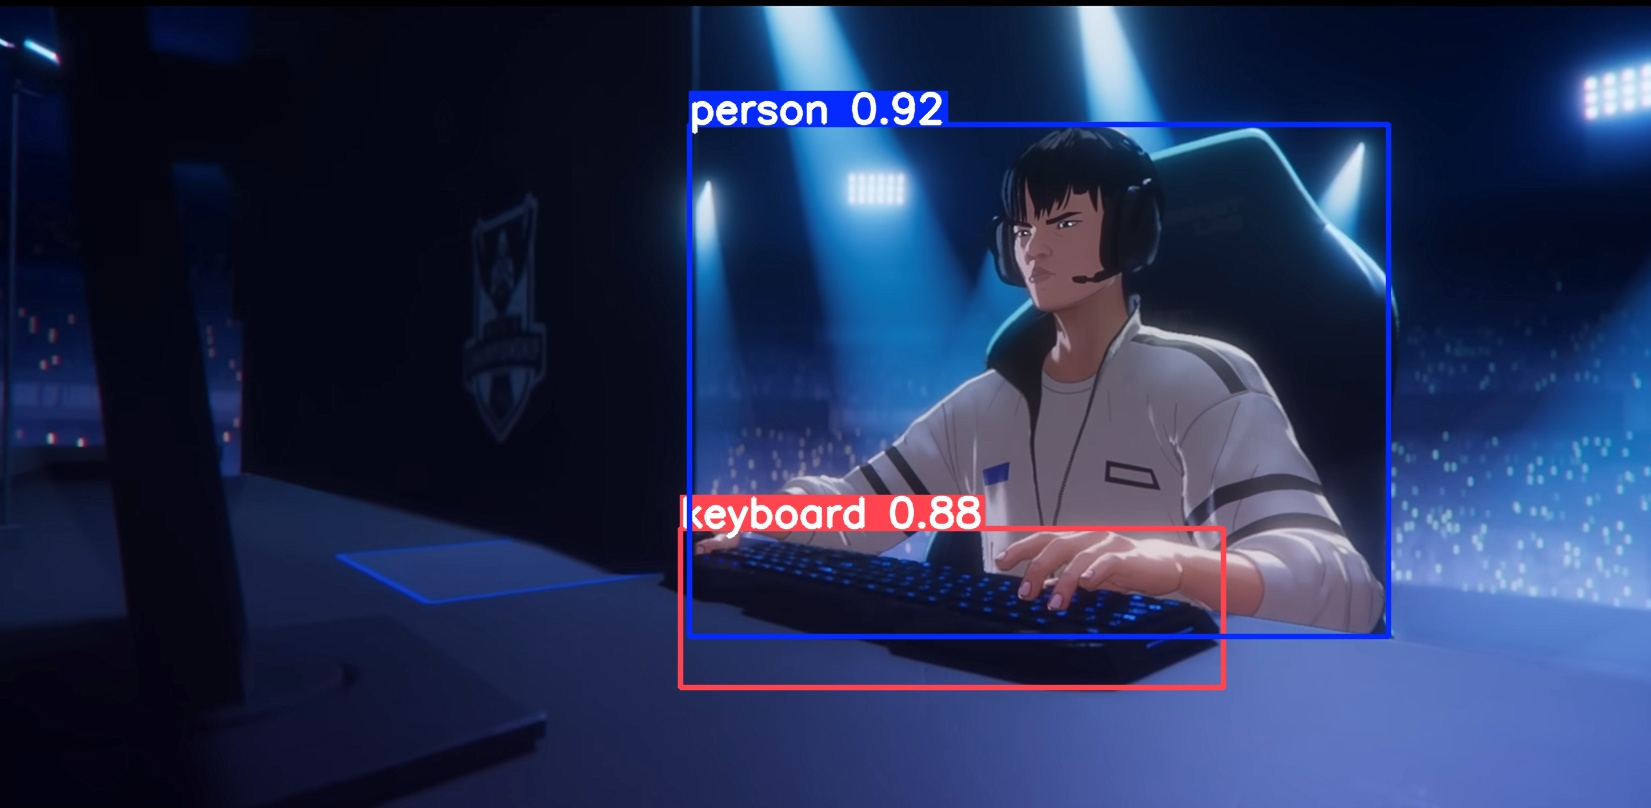

In [142]:
from IPython.display import Image as IPyImage

img = 'runs\detect\predict4\Kept.jpg'

IPyImage(filename=img, width=600)

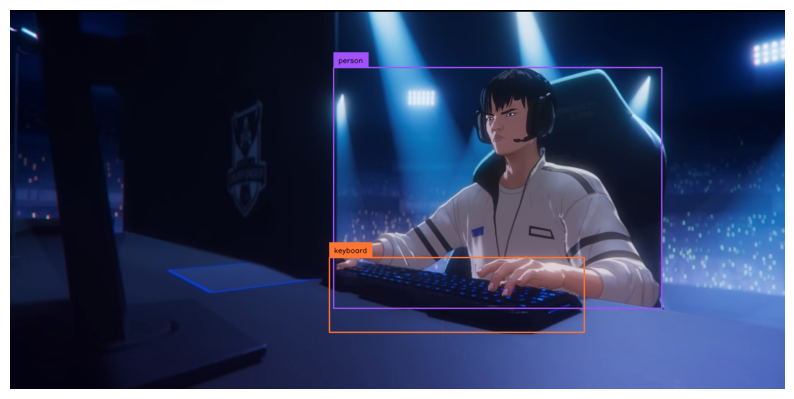

In [143]:
showResult(result, image_path)

## Fine - tune YOLO11 on custom dataset

**Set up dataset path**

In [144]:
# Set up dataset's diverse path
diverse_path = 'dataset\data.yaml'

**Train dataset**

In [148]:
# Define a YOLO model and print the model summary

# Load the model
model = YOLO('yolo11l.pt')

# Train the model
model.train(data=diverse_path, epochs=25, batch=32, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.76 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.75  Python-3.10.15 torch-2.6.0.dev20241206+cu118 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=dataset\data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

100%|██████████| 755k/755k [00:00<00:00, 1.76MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:02<00:00, 2.65MB/s]


AMP: checks passed 


train: Scanning D:\AB-BiMaGOoOD\DiddyLearning\dataset\train\labels... 1449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1449/1449 [00:00<00:00, 2253.03it/s]


train: New cache created: D:\AB-BiMaGOoOD\DiddyLearning\dataset\train\labels.cache


val: Scanning D:\AB-BiMaGOoOD\DiddyLearning\dataset\valid\labels... 138 images, 0 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<00:00, 1303.14it/s]

val: New cache created: D:\AB-BiMaGOoOD\DiddyLearning\dataset\valid\labels.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:27<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 200.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 10.51 GiB is allocated by PyTorch, and 43.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Count trainable and non-trainable parameters
trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params:,}")
print(f"Non-Trainable Parameters: {non_trainable_params:,}")

**Evaluate the model**

In [ ]:
# SDK (Software Development) prompt
# Input unseen data (Inference) to pretrained model
test_path = 'temp\❤.png'

result = model.predict(image_path, save_dir=f'{HOME}/runs/detect1/predict/', save = True, conf=0.5)

# Show the result
plt.show(result)

In [ ]:
from IPython.display import Image as IPyImage

img = 'runs\detect\predict2\Kept.jpg'

IPyImage(filename=img, width=600)

In [ ]:
showResult(test_path, result)